#DBSCAN: Density-Based Clustering

**Objective:** Learn how to group data based on density rather than distance from a center.

 **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** is a powerful clustering algorithm that finds clusters of any shape and automatically identifies outliers.

 **Why use DBSCAN over K-Means?**

-No need to specify $k$: You don't
have to guess the number of clusters.

-Handles Noise: It identifies points in low-density regions as outliers (labeled as -1).

-Arbitrary Shapes: It can find "necklace" or "crescent" shapes that K-Means fails to group correctly.

 **The Key HyperparametersTo run DBSCAN**

  you must define two values:
  
  -**Epsilon ($\epsilon$):** The maximum distance between two points to be considered "neighbors."MinSamples
  -**(MinPts):** The minimum number of points required within the $\epsilon$ radius to define a dense region (a "Core Point").

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [ ]:
# 1. Generate data (Two interlocking half-circles)
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# 2. Standardize data (Crucial for DBSCAN because of distance calculations)
X = StandardScaler().fit_transform(X)


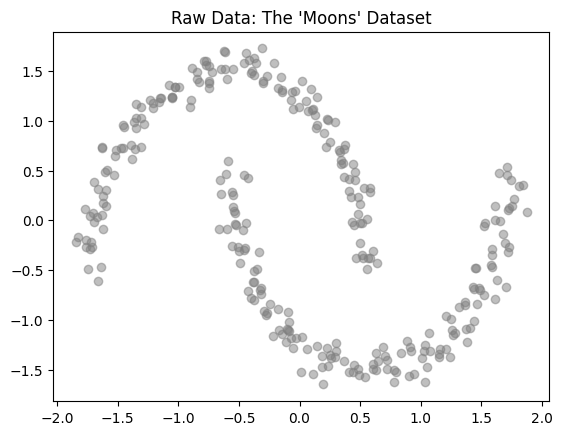

In [ ]:
# Visualize the raw data
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)
plt.title("Raw Data: The 'Moons' Dataset")
plt.show()

In [ ]:
# Initialize the models
kmeans = KMeans(n_clusters=2, n_init='auto')
dbscan = DBSCAN(eps=0.2, min_samples=5)

# Fit and Predict
y_kmeans = kmeans.fit_predict(X)
y_dbscan = dbscan.fit_predict(X)


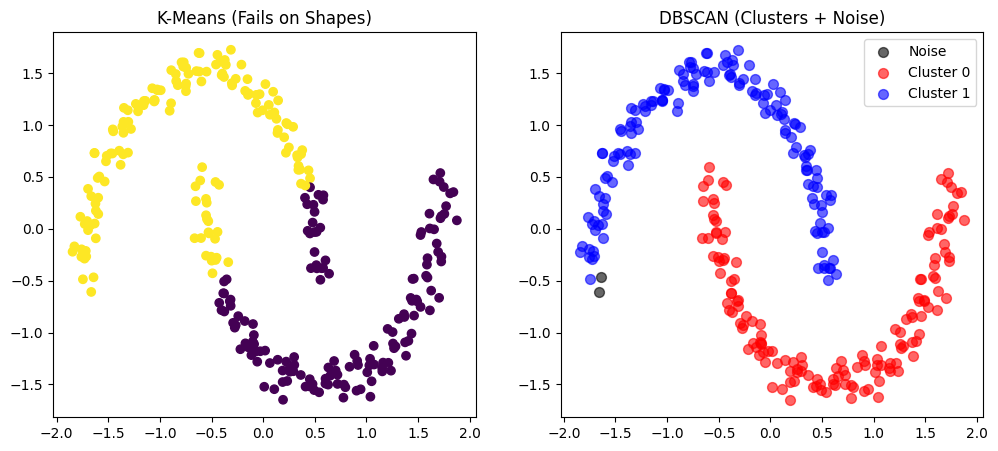

In [ ]:
# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# K-Means Plot
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
ax1.set_title("K-Means (Fails on Shapes)")

# DBSCAN Plot

colors_dbscan = ['red', 'blue', 'green', 'purple', 'orange']

for cluster in np.unique(y_dbscan):
    if cluster == -1:
        # Noise points
        color = 'black'
        label = 'Noise'
    else:
        color = colors_dbscan[cluster % len(colors_dbscan)]
        label = f'Cluster {cluster}'

    ax2.scatter(
        X[y_dbscan == cluster, 0],
        X[y_dbscan == cluster, 1],
        c=color,
        label=label,
        s=50,
        alpha=0.6
    )
ax2.set_title("DBSCAN (Clusters + Noise)")
ax2.legend()
# show the plots
plt.show()

In [ ]:
# Observations
print("Observations:")
print("- K-Means fails to separate the moon shapes correctly because it assumes spherical clusters.")
print("- DBSCAN successfully detects the two moon-shaped clusters.")
print("- Points labeled as -1 are considered noise or outliers.")
print("- DBSCAN can handle clusters of arbitrary shapes, unlike K-Means.")

Observations:
- K-Means fails to separate the moon shapes correctly because it assumes spherical clusters.
- DBSCAN successfully detects the two moon-shaped clusters.
- Points labeled as -1 are considered noise or outliers.
- DBSCAN can handle clusters of arbitrary shapes, unlike K-Means.


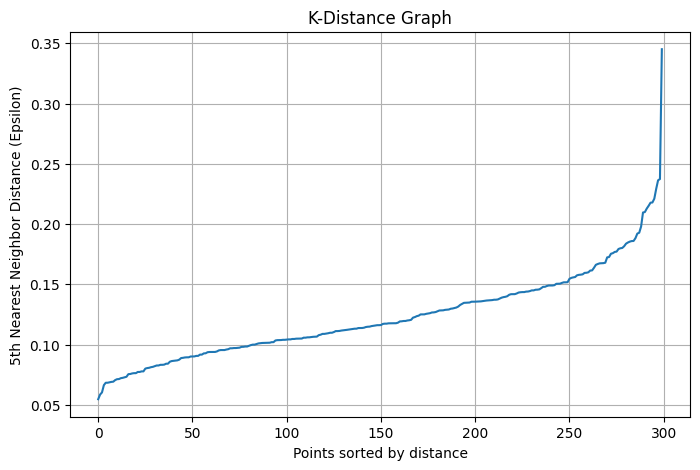

In [ ]:


# 1. Calculate distances to the 5th nearest neighbor (MinSamples = 5)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# 2. Sort the distances
distances = np.sort(distances[:, 4], axis=0)

# 3. Plot the K-distance Graph
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance (Epsilon)")
plt.grid(True)
plt.show()